In [2]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackman

In [29]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + np.sin(80.0 * 2.0*np.pi*x) +np.sin(300.0 * 2.0*np.pi*x) 
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

In [13]:
y_hat =np.abs(yf[0:N//2])

In [16]:
min(y_hat)

0.19891803655041773

In [18]:
te = 2.0/N * y_hat

In [19]:
max(te)

0.6406719914111308

In [20]:
min(te)

0.0006630601218347258

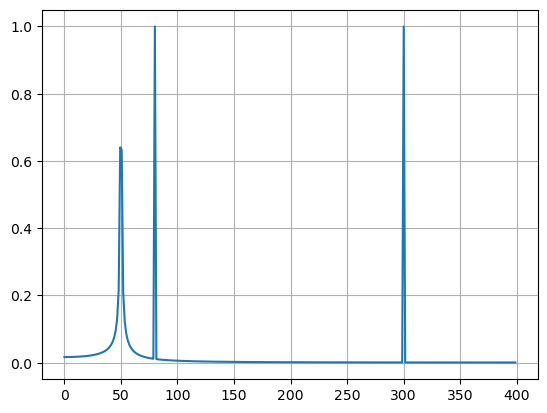

In [30]:
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [20]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

In [40]:
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]

In [41]:
len(xf)

600

In [35]:
len(yf)

600

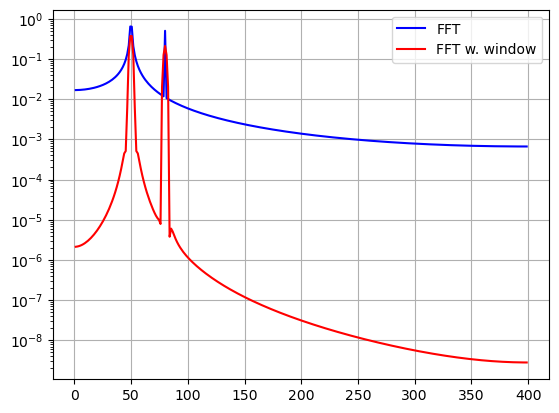

In [43]:
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In [25]:
freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In [44]:
from scipy.fft import fft, fftfreq, fftshift

In [32]:
import audioflux as af

In [1]:
import numpy as np
import audioflux as af

# Read audio data and sample rate
audio_arr, sr = af.read('data/one.wav')

# Extract mel spectrogram
spec_arr, _ = af.mel_spectrogram(audio_arr, samplate=sr)

In [58]:
import numpy as np
import audioflux as af
from audioflux.type import SpectralFilterBankScaleType

# Read audio data and sample rate
audio_arr, sr = af.read('data/one.wav')

# Create BFT object and extract mel spectrogram
bft_obj = af.BFT(num=2, radix2_exp=12, samplate=sr,
                 scale_type=SpectralFilterBankScaleType.MEL)
spec_arr = bft_obj.bft(audio_arr)
spec_arr = np.abs(spec_arr)


In [59]:
spec_arr.shape

(2, 11036)

In [27]:
len(spec_arr)

256

In [25]:
len(spec_arr[0])

11036

In [60]:
def get_more_rows(spec_arr,n):
    new = []
    for i in range(len(spec_arr)):
        for times in range(n):
            new.append(spec_arr[i])
    return np.array(new)

In [61]:
tr = get_more_rows(spec_arr,5000)

In [62]:
tr.shape

(10000, 11036)

In [53]:
np.max(tr)

149.26491

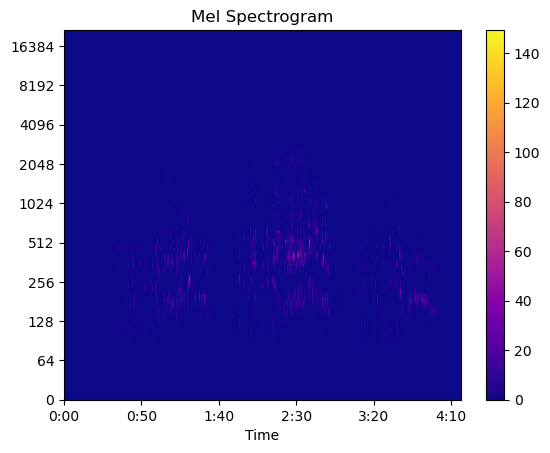

In [21]:
import matplotlib.pyplot as plt
from audioflux.display import fill_spec
audio_len = audio_arr.shape[-1]
fig, ax = plt.subplots()
img = fill_spec(spec_arr, axes=ax,
          x_coords=bft_obj.x_coords(audio_len),
          y_coords=bft_obj.y_coords(),
          x_axis='time', y_axis='log',
          title='Mel Spectrogram')
fig.colorbar(img, ax=ax)

In [16]:
import matplotlib.pyplot as plt

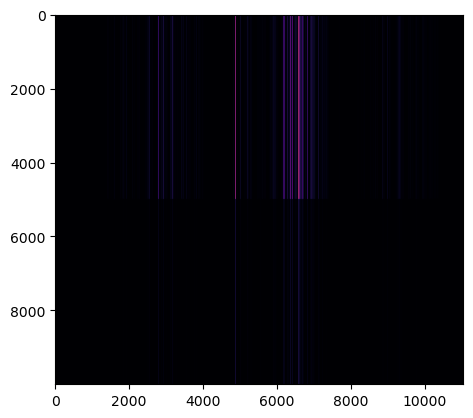

In [63]:
plt.imshow(tr, cmap = 'inferno')

In [22]:
type(img)

matplotlib.collections.QuadMesh

AttributeError: 'QuadMesh' object has no attribute 'shape'